# Logistic Regression

## Financial Sentiment Analysis

Le but de ce projet est de **prédire le sentiment (positif/neutre/négatif) de textes à caractère financier**.

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

## Exercice


### Load Data
1. Loadez et examinez les data.<br>
   ```
   df = pd.read_csv("./data/FinancialSentiment.csv")
   ```


### Data Analysis
2. Faites l'histogramme de votre variable réponse, pour savoir si on a affaire à un problème équilibré (balanced) ou non.


### Model
3. "Splitez" vos data en un **train set** et un **test set**.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    

4. Utilisez la méthode appelée **TF-IDF** pour transformer vos data textuelles en vecteurs. Documentez-vous pour comprendre cette méthode.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer
    

5. Fittez une **régression logistique** sur vos data.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression<br>
    Calculer le **rapport de classification (classification report)** relatif à vos prédictions.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report


6. Fittez deux autres modèles sur vos data appelés **support vector machine classifier (SVC)** et **naive Bayes classifier (NB)**:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html<br>
    Calculer le **rapport de classification (classification report)** relatif à vos prédictions.<br>


## Librairies

In [26]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

## Load Data

In [2]:
df = pd.read_csv("./data/FinancialSentiment.csv")

In [3]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [4]:
df.iloc[30]

Sentence     Stockmann and Swedish sector company AB Lindex...
Sentiment                                             positive
Name: 30, dtype: object

In [6]:
df.iloc[30].Sentence

"Stockmann and Swedish sector company AB Lindex entered into an agreement on September 30 , 2007 , whereby Stockmann , or a wholly-owned subsidiary of it , will make a public tender offer for all of Lindex 's issued shares ."

In [7]:
df.iloc[30].Sentiment

'positive'

## Data Analysis

In [44]:
df.Sentiment.value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

In [45]:
sts = df.Sentiment.value_counts()

[]

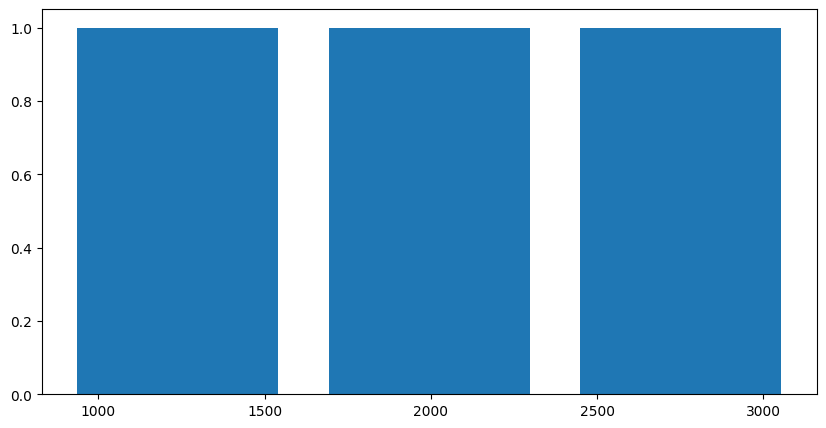

In [46]:
plt.figure(figsize=(10, 5))
plt.hist(sts, bins=3, histtype='bar', rwidth=0.8)
plt.plot()

## Models

In [18]:
X = df.Sentence
y = df.Sentiment

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
tfidf = TfidfVectorizer()
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)

X_test_tfidf = tfidf.transform(X_test)

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train_tfidf, y_train)
y_test_pred = knn.predict(X_test_tfidf)

In [35]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.29      0.25      0.27       220
     neutral       0.71      0.81      0.76       778
    positive       0.66      0.56      0.60       463

    accuracy                           0.64      1461
   macro avg       0.55      0.54      0.54      1461
weighted avg       0.63      0.64      0.63      1461



### LR

In [38]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_tfidf, y_train)
y_test_pred = lr.predict(X_test_tfidf)

In [39]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.44      0.55      0.49       220
     neutral       0.80      0.75      0.77       778
    positive       0.75      0.75      0.75       463

    accuracy                           0.72      1461
   macro avg       0.66      0.68      0.67      1461
weighted avg       0.73      0.72      0.72      1461



### LR, SVC and NB

In [59]:
pip = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("model", LogisticRegression(class_weight='balanced'))
])

In [60]:
pip.fit(X_train, y_train)
y_test_pred = pip.predict(X_test)

In [61]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.44      0.55      0.49       220
     neutral       0.80      0.75      0.77       778
    positive       0.75      0.75      0.75       463

    accuracy                           0.72      1461
   macro avg       0.66      0.68      0.67      1461
weighted avg       0.73      0.72      0.72      1461



In [62]:
pip = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("model", MultinomialNB(alpha=0.01))
])
pip.fit(X_train, y_train)
y_test_pred = pip.predict(X_test)

In [63]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.35      0.34      0.34       220
     neutral       0.72      0.79      0.75       778
    positive       0.73      0.62      0.67       463

    accuracy                           0.67      1461
   macro avg       0.60      0.58      0.59      1461
weighted avg       0.67      0.67      0.67      1461



In [64]:
pip = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("model", SVC())
])
pip.fit(X_train, y_train)
y_test_pred = pip.predict(X_test)

In [65]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.26      0.09      0.13       220
     neutral       0.69      0.89      0.78       778
    positive       0.80      0.65      0.71       463

    accuracy                           0.69      1461
   macro avg       0.58      0.54      0.54      1461
weighted avg       0.66      0.69      0.66      1461



## Hyperparameter Tuning

In [69]:
pip = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("model", SVC())
])

In [70]:
parameters = {"tfidf__ngram_range": [(1, 1), (1, 2)],
              "model__C": np.logspace(-2, 2, 5)}

In [71]:
gs = GridSearchCV(pip, parameters, verbose=1)
gs.fit(X_train, y_train)
y_test_pred = gs.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [72]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.26      0.09      0.13       220
     neutral       0.69      0.89      0.78       778
    positive       0.80      0.65      0.71       463

    accuracy                           0.69      1461
   macro avg       0.58      0.54      0.54      1461
weighted avg       0.66      0.69      0.66      1461



In [79]:
pip = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("model", LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [80]:
parameters = {"tfidf__ngram_range": [(1, 1), (1, 2)],
              "model__C": np.logspace(-2, 2, 5)}

In [81]:
gs = GridSearchCV(pip, parameters, verbose=1)
gs.fit(X_train, y_train)
y_test_pred = gs.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [82]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.44      0.55      0.49       220
     neutral       0.80      0.75      0.77       778
    positive       0.75      0.75      0.75       463

    accuracy                           0.72      1461
   macro avg       0.66      0.68      0.67      1461
weighted avg       0.73      0.72      0.72      1461



### EXEMPLE SAE


In [91]:
text = "JP Morgan makes a benefice of 1 billion dollars"

In [92]:
gs.predict([text])

array(['neutral'], dtype=object)

In [85]:
text = "FUCK"

In [93]:
import pickle

In [97]:
with open("model.pkl", "wb") as f:
    pickle.dump(gs, f)

In [98]:
with open("model.pkl", "rb") as f:
    my_model = pickle.load(f)

In [99]:
my_model.predict([text])

array(['neutral'], dtype=object)